# 기본 Settings

In [239]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 300)
pd.set_option('display.width', 30)

In [26]:
with open('./전국무료급식소표준데이터 (1).json',encoding='UTF8') as f:
    data = json.load(f)

In [27]:
df = pd.DataFrame.from_dict(data['records'])

# 데이터 살펴보기

In [280]:
# null 이 있는게 좀 있네?
# 도로명주소로 하는게 좋아보임
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1410 entries, 0 to 1441
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   시설명       1410 non-null   object
 1   소재지도로명주소  1410 non-null   object
 2   소재지지번주소   1327 non-null   object
 3   운영기관명     1410 non-null   object
 4   전화번호      1377 non-null   object
 5   급식장소      1410 non-null   object
 6   급식대상      1410 non-null   object
 7   급식시간      1410 non-null   object
 8   위도        1407 non-null   object
 9   경도        1407 non-null   object
 10  데이터기준일자   1410 non-null   object
 11  제공기관코드    1410 non-null   object
 12  제공기관명     1410 non-null   object
 13  급식요일      1358 non-null   object
 14  운영시작일자    1319 non-null   object
 15  운영종료일자    1160 non-null   object
dtypes: object(16)
memory usage: 227.3+ KB


## Issue

- null 있는거 어쨰함?

In [284]:
#
df[df.isnull().any(axis=1)]

,시설명,소재지도로명주소,소재지지번주소,운영기관명,전화번호,급식장소,급식대상,급식시간,위도,경도,데이터기준일자,제공기관코드,제공기관명,급식요일,운영시작일자,운영종료일자
0,수서종합사회복지관,서울특별시 강남구 광평로 56길 11,서울특별시 강남구 수서동 723,수서종합사회복지관,02-451-7244,수서종합사회복지관,만60세이상 결식우려가 있는 강남구 거주 저소득 어르신,중식(11:30~12:30),37.4879790845,127.1056313773,2020-03-01,3220000,서울특별시 강남구,NaN,NaN,NaN
1,대청종합사회복지관,서울특별시 강남구 양재대로 55길 10,서울특별시 강남구 일원동 711,대청종합사회복지관,02-459-6332,대청종합사회복지관,만60세이상 결식우려가 있는 강남구 거주 저소득 어르신,중식(11:00~12:00),37.4931558395,127.0909926420,2020-03-01,3220000,서울특별시 강남구,NaN,NaN,NaN
2,세곡리엔파크4단지 경로당,서울특별시 강남구 헌릉로590길 88,서울특별시 강남구 세곡동 522,사회복지법인 영산,02-565-3857,세곡리엔파크4단지 경로당,만60세이상 결식우려가 있는 강남구 거주 저소득 어르신,중식(11:30~12:30),37.4628770239,127.1014454587,2020-03-01,3220000,서울특별시 강남구,NaN,NaN,NaN
3,대청경로당,서울특별시 강남구 개포로124길 24,서울특별시 강남구 일원동 621,사회복지법인 영산,02-565-3857,대청경로당,만60세이상 결식우려가 있는 강남구 거주 저소득 어르신,중식(11:30~12:30),37.4931977652,127.0830002458,2020-03-01,3220000,서울특별시 강남구,NaN,NaN,NaN
4,대치1단지(일원2) 경로당,서울특별시 강남구 개포로 109길 5,서울특별시 강남구 개포동 12,사회복지법인 영산,02-565-3857,대치1단지(일원2) 경로당,만60세이상 결식우려가 있는 강남구 거주 저소득 어르신,중식(11:30~12:30),37.4923311992,127.0745908046,2020-03-01,3220000,서울특별시 강남구,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,청양군노인종합복지관,충청남도 청양군 청양읍 칠갑산로 2길4,충청남도 청양군 청양읍 읍내리 188-5,청양군노인종합복지관,041-943-8807,청양군노인종합복지관,50,중식(12:00),36.450948,126.800131,2019-09-06,4590000,충청남도 청양군,주중,NaN,NaN
921,뜰안채,경기도 김포시 통진읍 마송1로 16번길 40-2,경기도 김포시 통진읍 마송리 565-9,김포시북부노인복지관,031-984-0108,김포시북부노인복지관,만60세 이상 기초수급자 및 차상위계층 등,11:30~13:00,37.6837263363,126.606895073,2019-05-14,4090000,경기도 김포시,"월, 화, 수, 목, 금",2014-10-01,NaN
945,신관동새마을부녀회 급식소,충청남도 공주시 번영2로 10-5(신관동),충청남도 공주시 신관동 606-9,신관동새마을부녀회,041-853-2137,공주시여성회관,결식우려 저소득층 노인,중식(11:30-13:00),36.4688136,127.1325612,2019-09-25,4500000,충청남도 공주시,"주3회(월, 수, 금)",NaN,NaN
946,대한적십자사봉사회 공주지구협의회 급식소,충청남도 공주시 봉황로 125(교동),충청남도 공주시 교동 120,대한적십자사봉사회 공주지구협의회,041-854-1210,대한적십자사봉사회 공주지구협의회,결식우려 저소득층 노인,중식(11:30-13:00),36.4568483374,127.1207351918,2019-09-25,4500000,충청남도 공주시,"주4회(월, 화, 수, 목)",NaN,NaN


In [72]:
df.head(5)

,시설명,소재지도로명주소,소재지지번주소,운영기관명,전화번호,급식장소,급식대상,급식시간,위도,경도,데이터기준일자,제공기관코드,제공기관명,급식요일,운영시작일자,운영종료일자
0,수서종합사회복지관,서울특별시 강남구 광평로 56길 11,서울특별시 강남구 수서동 723,수서종합사회복지관,02-451-7244,수서종합사회복지관,만60세이상 결식우려가 있는 강남구 거주 저소득 어르신,중식(11:30~12:30),37.4879790845,127.1056313773,2020-03-01,3220000,서울특별시 강남구,NaN,NaN,NaN
1,대청종합사회복지관,서울특별시 강남구 양재대로 55길 10,서울특별시 강남구 일원동 711,대청종합사회복지관,02-459-6332,대청종합사회복지관,만60세이상 결식우려가 있는 강남구 거주 저소득 어르신,중식(11:00~12:00),37.4931558395,127.0909926420,2020-03-01,3220000,서울특별시 강남구,NaN,NaN,NaN
2,세곡리엔파크4단지 경로당,서울특별시 강남구 헌릉로590길 88,서울특별시 강남구 세곡동 522,사회복지법인 영산,02-565-3857,세곡리엔파크4단지 경로당,만60세이상 결식우려가 있는 강남구 거주 저소득 어르신,중식(11:30~12:30),37.4628770239,127.1014454587,2020-03-01,3220000,서울특별시 강남구,NaN,NaN,NaN
3,대청경로당,서울특별시 강남구 개포로124길 24,서울특별시 강남구 일원동 621,사회복지법인 영산,02-565-3857,대청경로당,만60세이상 결식우려가 있는 강남구 거주 저소득 어르신,중식(11:30~12:30),37.4931977652,127.0830002458,2020-03-01,3220000,서울특별시 강남구,NaN,NaN,NaN
4,대치1단지(일원2) 경로당,서울특별시 강남구 개포로 109길 5,서울특별시 강남구 개포동 12,사회복지법인 영산,02-565-3857,대치1단지(일원2) 경로당,만60세이상 결식우려가 있는 강남구 거주 저소득 어르신,중식(11:30~12:30),37.4923311992,127.0745908046,2020-03-01,3220000,서울특별시 강남구,NaN,NaN,NaN


# 전처리

## 지역별 급식소 수

In [182]:
df['소재지도로명주소'].str.split(" ",expand = True)[0].value_counts()

경기도        233
전라남도       193
서울특별시      171
경상남도        98
전라북도        85
부산광역시       85
대구광역시       81
울산광역시       70
강원도         63
충청남도        59
광주광역시       58
인천광역시       58
대전광역시       55
경상북도        54
충청북도        32
제주특별자치도     11
의정부시         1
충청남도홍성군      1
세종특별자치시      1
             1
Name: 0, dtype: int64

## 중복된 데이터 처리

- 현재 몇개의 같은 row 가 중복되어서 들어가있다.
- 이는 담당자의 실수라고 판단된다. 즉 삭제하기로 하였다.

In [74]:
df.drop_duplicates(inplace= True)

# 소재지 도로명주소 처리

In [273]:
# 2개인데가 여전히 많다.
df['소재지도로명주소'].value_counts().value_counts()

1    1136
2     127
5       2
3       2
4       1
Name: 소재지도로명주소, dtype: int64

In [274]:
df['소재지도로명주소'].value_counts()

경기도 수원시 팔달구 덕영대로 924         5
충청남도 아산시 온천대로 1496           5
대전광역시 서구 월평북로 11             4
대구광역시 달서구 대명천로 28            3
대구광역시 북구 관음동로9길 10-25        3
                            ..
경상남도 통영시 봉수로 21-4 (봉평동)      1
경상남도 김해시 활천로 294(삼방동)        1
전라남도 담양군 고서면 잣정길 67          1
서울특별시 종로구 종로11길 9-20(인사동)    1
                             1
Name: 소재지도로명주소, Length: 1268, dtype: int64

## Issue

In [278]:
# 미쳣나? 위도경도가 일치하는데 시설명이 다른경우가 존대함
# 게다가 이경우 주소를 기준으로 통합시켜야될거같음
# 아니 시설명이 또 송선화 집사는 뭐임?
df[df['소재지도로명주소'] == '경기도 수원시 팔달구 덕영대로 924']

,시설명,소재지도로명주소,소재지지번주소,운영기관명,전화번호,급식장소,급식대상,급식시간,위도,경도,데이터기준일자,제공기관코드,제공기관명,급식요일,운영시작일자,운영종료일자
1178,한벗교회,경기도 수원시 팔달구 덕영대로 924,경기도 수원시 팔달구 매산동 매산로1가 18,한벗교회,031-296-4740,무한돌봄 정나눔터,노숙인,조식(07:30~08:30),37.26567858,127.0000947,2020-08-01,3740000,경기도 수원시,월+화+수+목+금+토,2014-01-28,
1179,함께하는교회(광야119),경기도 수원시 팔달구 덕영대로 924,경기도 수원시 팔달구 매산동 매산로1가 18,함께하는교회(광야119),031-254-2119,무한돌봄 정나눔터,노숙인,석식(19:30~20:30),37.26567858,127.0000947,2020-08-01,3740000,경기도 수원시,월+화+수+목+금+토,2014-01-28,
1180,성령충만교회,경기도 수원시 팔달구 덕영대로 924,경기도 수원시 팔달구 매산동 매산로1가 18,성령충만교회,031-207-6683,무한돌봄 정나눔터,노숙인,석식(19:30~20:30),37.26567858,127.0000947,2020-08-01,3740000,경기도 수원시,월,2014-01-28,
1181,사랑을 만드는사람들,경기도 수원시 팔달구 덕영대로 924,경기도 수원시 팔달구 매산동 매산로1가 18,사랑을 만드는사람들,031-207-6683,무한돌봄 정나눔터,노숙인,조식(07:30~08:30),37.26567858,127.0000947,2020-08-01,3740000,경기도 수원시,첫째주 일+셋째주 일,2014-01-28,
1182,송선화집사,경기도 수원시 팔달구 덕영대로 924,경기도 수원시 팔달구 매산동 매산로1가 18,송선화집사,031-207-6683,무한돌봄 정나눔터,노숙인,중식(12:00-13:00),37.26567858,127.0000947,2020-08-01,3740000,경기도 수원시,월,2014-01-28,


# 시설명 처리

In [259]:
df['시설명'].value_counts() # 선린종합사회복지관은 대체 뭐하는곳임?

선린종합사회복지관     5
동구노인복지관       5
남구종합사회복지관     4
학산종합사회복지관     4
희망의집          4
             ..
고흥중앙경로식당      1
나눔터           1
서서울어르신복지관     1
효림재가노인지원센터    1
만성1구경로당       1
Name: 시설명, Length: 1232, dtype: int64

In [254]:
# 한 시설에서 왜 2개 이상 운영을 한다고 나와있을까?
df['시설명'].value_counts().value_counts()

1    1073
2     147
3       7
4       3
5       2
Name: 시설명, dtype: int64

<AxesSubplot:>

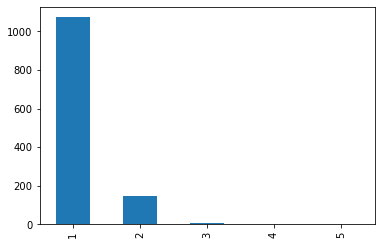

In [253]:
# 거의 의미도 없는 수듄...
df['시설명'].value_counts().value_counts().plot.bar()

## Issue

In [262]:
# 아니 미쳣나? 왜 다름? 
# 전화번호 일치함. 주소가 다름. ?
df[df['시설명'] == '선린종합사회복지관']

,시설명,소재지도로명주소,소재지지번주소,운영기관명,전화번호,급식장소,급식대상,급식시간,위도,경도,데이터기준일자,제공기관코드,제공기관명,급식요일,운영시작일자,운영종료일자
666,선린종합사회복지관,대구광역시 북구 관음동로9길 10-25,대구광역시 북구 관음동 477-1,선린종합사회복지관,053-323-2297,코로나 상황에 따라 급식 잠정 중단,노인,잠정중단,35.937826,128.545502,2020-07-20,3450000,대구광역시 북구,잠정 중단,,
1399,선린종합사회복지관,대구광역시 북구 관음동로9길 10-25,대구광역시 북구 관음동 477-1,선린종합사회복지관,053-323-2297,선린종합사회복지관,노인,중식(11:30~12:30),35.9378261,128.5455021,2020-07-06,6270000,대구광역시,화.수,,
1400,선린종합사회복지관,대구광역시 북구 관음동로9길 10-25,대구광역시 북구 구암동 694,선린종합사회복지관,053-323-2297,구암공원,누구나,중식(11:30~12:30),35.9378261,128.5455021,2020-07-06,6270000,대구광역시,월 3회 월요일,,
1401,선린종합사회복지관,대구광역시 북구 칠곡중앙대로52길 38,대구광역시 북구 태전동 608-12,선린종합사회복지관,053-323-2297,부광교회,누구나,중식(11:30~12:30),35.9218148,128.5495474,2020-07-06,6270000,대구광역시,"1째, 3째주 목요일",,
1402,선린종합사회복지관,대구광역시 북구 동천로 33,대구광역시 북구 동천동 950-1,선린종합사회복지관,053-323-2297,동천공원,누구나,중식(11:30~12:30),35.93475358,128.5578616,2020-07-06,6270000,대구광역시,"2째, 4째주 목요일",,


In [266]:
# 아니 이건뭐임?
# 위도/ 경도로 찍어봐야겠는데?
df[df['시설명'] == '희망의집']

,시설명,소재지도로명주소,소재지지번주소,운영기관명,전화번호,급식장소,급식대상,급식시간,위도,경도,데이터기준일자,제공기관코드,제공기관명,급식요일,운영시작일자,운영종료일자
1130,희망의집,대구광역시 남구 이천로28길 8-52(이천동),대구광역시 남구 이천동 381-9,함께하는마음재단,053-476-6635,대구광역시 중구 달성공원로 35 달성공원,취약계층,10:00~12:30,35.8526595,128.5992855900,2020-07-09,3410000,대구광역시 중구,토,,
1229,희망의집,대구광역시 남구 대봉로 108,대구광역시 남구 이천동 557-9,사)함께하는마음재단,053-476-6635,"희망의집(화,금),희망교(목),달성공원(토)","결식노인,저소득층",중식,35.848233,128.6041693,2020-09-22,3440000,대구광역시 남구,"화,목,금,토",,
1382,희망의집,대구광역시 남구 이천로28길 8-52(이천동),대구광역시 남구 이천동 381-9,함께하는마음재단,053-476-6635,대구광역시 중구 달성공원로 35 달성공원,취약계층,11:30~12:30,35.8526595,128.5992856,2020-07-06,6270000,대구광역시,토,,
1392,희망의집,대구광역시 남구 대봉로 108,대구광역시 남구 이천동 557-9,사)함께하는마음재단,053-476-6635,"희망의집(화,금),희망교(목),달성공원(토)","결식노인,저소득층",중식,35.8482195,128.6041693,2020-07-06,6270000,대구광역시,"화,목,금,토",,


# 급식시간 처리

## 공백 없애기

- dd:dd , dd :dd 등의 띄어쓰기로 인한 에러를 감안해야 하므로 공백을 없앤다

In [206]:
df['급식시간'] = df['급식시간'].str.replace(' ','')

## dd:dd 형식

- 형식은 다음과 같이 크게 나누어졌다.
    - dd:dd~dd:dd
    - dd:dd-dd:dd
    - dd:dd 만 명시

In [194]:
# dd:dd 형식이 없었던 데이터의 수는 총 116개
len(df['급식시간'])-sum(df['급식시간'].str.contains(r'(\d{2}:\d{2})',regex=True))

116

In [195]:
# dd:dd 형식이 있는 데이터를 조사한 결과 최대 길이는 6 이였다.
np.max(df['급식시간'].str.findall(r'(\d{2}:\d{2})').apply(len))

6

In [211]:
df2 = df[~df['급식시간'].str.contains(r'(\d{2}:\d{2})',regex=True)]

## w시 형식
- 이 떄에 위 dd:dd 를 제외하고도 0시 의 형식이 있었기에 이를 조사하였다.

In [230]:
df2[df2['급식시간'].str.contains(r'(\w시)')]['급식시간']

C:\Users\goran\Anaconda3\envs\tensor\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


72                12시
73                12시
74                12시
75                12시
76                12시
77                12시
78                12시
79                12시
80                12시
81                12시
181           12시-13시
251          오전11시30분
252          오전11시40분
253          오전11시40분
254             오전11시
357             오전11시
358             오전11시
359          오전11시30분
932     11시30분~12시30분
961     11시30분~12시30분
983     11시30분~12시30분
984     11시30분~12시30분
985     11시30분~12시30분
986     11시30분~12시30분
987     11시30분~12시30분
988     11시30분~12시30분
989     11시30분~12시30분
990     11시30분~12시30분
991     11시30분~12시30분
992     11시30분~12시30분
993     11시30분~12시30분
994     11시30분~12시30분
995     11시30분~12시30분
996     11시30분~12시30분
997     11시30분~12시30분
998     11시30분~12시30분
999     11시30분~12시30분
1000    11시30분~12시30분
1001    11시30분~12시30분
1002    11시30분~12시30분
1003    11시30분~12시30분
1004    11시30분~12시30분
1005    11시30분~12시30분
1006    11시30분~12시30분
1007    11시30분~12시30분
1008    11

- 위에서 감안하지 못한 에러사항은 아래와 같다.
- 점심, 주2회 등의 단어가 눈에 띤다. 
- 이 경우는 그냥 인덱스를 옆으로 옮겨야할 듯 하다.

In [215]:
df2[~df2['급식시간'].str.contains(r'(\w시)')]['급식시간']

134               점심
135               점심
136              주2회
137              주2회
148               중식
154     주1회(6일분)반찬배달
156               중식
157               중식
212     주1회(6일분)반찬배달
213     주1회(6일분)반찬배달
214     주1회(6일분)반찬배달
215     주1회(6일분)반찬배달
216     주1회(6일분)반찬배달
232     주1회(6일분)반찬배달
243     주1회(6일분)반찬배달
244     주1회(6일분)반찬배달
666             잠정중단
756     주1회(6일분)반찬배달
784     주1회(6일분)반찬배달
785     주1회(6일분)반찬배달
1229              중식
1230              중식
1231              중식
1232           조식(토)
1233              중식
1388              중식
1389              중식
1390              중식
1391              중식
1392              중식
1393              중식
1394              중식
1395     중식(금),조식(토)
1396              중식
Name: 급식시간, dtype: object

## 특이 형식 일일히 수정하기

**수정** 

5개로 나누어서 아래와 같이 범주화해서 나누도록 하겠다.
- 주1회(6일분)반찬배달 
- 잠정중단 
- 중식
- 조식
- 시간


## 그 밖 형식 조사

- 예외형식을 조사해본 결과 아래와 같이 
    - dd시
    - 점심
    - 주2회
    - 중식
    - 조식
- 와 같이 나타났다.

In [201]:
df[~df['급식시간'].str.contains(r'(\d{2}:\d{2})',regex=True)]['급식시간']

72                12시
73                12시
74                12시
75                12시
76                12시
77                12시
78                12시
79                12시
80                12시
81                12시
134                점심
135                점심
136               주2회
137               주2회
148                중식
154      주1회(6일분)반찬배달
156                중식
157                중식
181           12시-13시
212      주1회(6일분)반찬배달
213      주1회(6일분)반찬배달
214      주1회(6일분)반찬배달
215      주1회(6일분)반찬배달
216      주1회(6일분)반찬배달
232      주1회(6일분)반찬배달
243      주1회(6일분)반찬배달
244      주1회(6일분)반찬배달
251          오전11시30분
252          오전11시40분
253          오전11시40분
254             오전11시
357             오전11시
358             오전11시
359          오전11시30분
666              잠정중단
756      주1회(6일분)반찬배달
784      주1회(6일분)반찬배달
785      주1회(6일분)반찬배달
932     11시30분~12시30분
961     11시30분~12시30분
983     11시30분~12시30분
984     11시30분~12시30분
985     11시30분~12시30분
986     11시30분~12시30분
987     11시30분~12시30분
988     11

In [ ]:
df['급식시간'].head(n=300)

# 급식대상 처리

- 이건 좀 재미가 없다.
- 다 노인임
- 그리고 여기에만 딱 해당되게 하지는 않을것

## Issue
- 그냥 재미가 없음
- 의미도없고
- 삭제요망

In [235]:
df['급식대상'].unique()

array(['만60세이상 결식우려가 있는 강남구 거주 저소득 어르신', '만 60세 이상 노인',
       '독거노인, 결식노인, 저소득어르신 등', '60세이상 저소득 결식우려노인',
       '만 60세 이상 결식 우려 저소득 어르신', '저소득 및 결식노인', '65세이상 경로당 이용어르신',
       '결식이우려되는어르신', '65세이상 저소득 결식우려 노인', '독거노인',
       '가정형편이 어렵거나 부득이한 사정으로 식사를 거를 우려가 있는 60세 이상 노인', '관내 65세 이상 노인',
       '노인 및 취약계층', '복지관이 위치한 지역 내 만65세 이상 노인', '독거노인, 결식노인 등',
       '60세이상 독거노인 및 결식우려 노인', '독거노인, 결식우려 저소득 재가노인', '65세이상 노인',
       '60세이상노인', '70세이상 노인', '독거노인, 결식노인, 노숙인, 저소득층 등', '60세이상 노인',
       '기초수급, 차상위 노인', '기초생활수급자, 차상위, 저소득층', '기초수급자 및 차상위계층 노인, 저소득 독거노인',
       '노인복지관 이용인', '장애인복지관 이용인', '65세이상 지역주민', '저소득 노인, 결식노인 등',
       '취약계층 노인', '노인', '독거노인, 장애인', '독거노인,조손가정, 장애인가정등',
       '60세이상 저소득 결식우려 어르신', '60세 이상 저소득노인', '기초생활수급자, 차상위, 저소득 독거노인',
       '기초수급 및 저소득층', '65세 이상, 저소득 결식우려 독거노인', '저소득층',
       '만 60세이상 저소득 노인, 독거노인 등', '독거노인, 극빈층 등.', '통영시 거주 등록장애인 및 결식우려대상자',
       '저소득 결식우려노인', '독거노인, 노숙자,장애인 등', '노숙자 및 극빈층', '독거노인, 결식노인, 저소득층',
       '기초생활수급권자, 차상위계층', '기초생활수급자

In [ ]:
bob2 = df['급식시간'].str.extract('r(\d{2}:\{d})-')

In [35]:
df.to_csv('raw_file.csv')